In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import geobr
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tqdm import tqdm
import mapclassify as mpcl

In [18]:
# Importing geometry files for plots
country = geobr.read_country(year = 2015)
regions = geobr.read_region(year = 2015)
states = geobr.read_state(year = 2015)

## Households per census tract

In [3]:
census_tract = geobr.read_census_tract(code_tract = 'all', year = 2010)

In [11]:
census_tract['code_tract'] = census_tract['code_tract'].astype('float')

In [4]:
setores_dom = pd.read_csv('Domicilios_particulares_e_coletivos_por_setor_censitario_2010.csv')

In [12]:
census_tract = census_tract.merge(setores_dom, how="left", left_on="code_tract", right_on="Cod_setor")

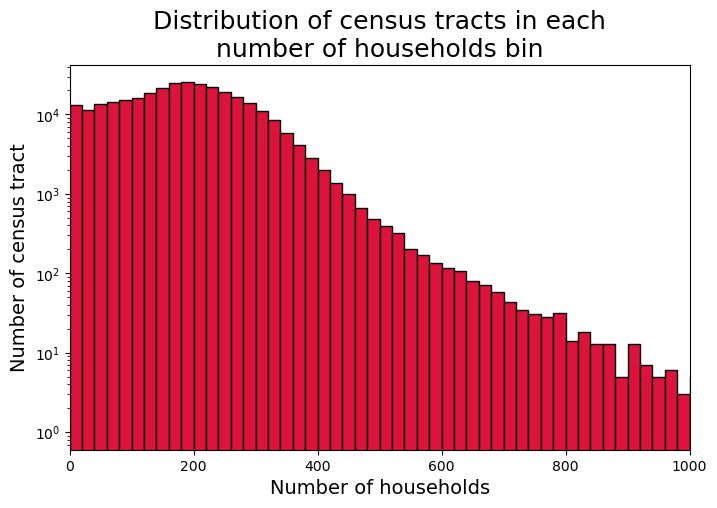

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
plt.hist(census_tract['Domicilios_particulares_e_coletivos'], bins = [20*i for i in range(100)],
        edgecolor = 'black', color = 'crimson')
# plt.xscale('log')
plt.yscale('log')
plt.xlim(0, 1000)
plt.xlabel('Number of households', fontsize = 14)
plt.ylabel('Number of census tract', fontsize = 14)
plt.title('Distribution of census tracts in each'
          '\n'
          'number of households bin', fontsize = 18)
fig.patch.set_alpha(1)
# plt.savefig('Distribuicao_setores_censitarios.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [29]:
# List of colors
colors = ['white', "seagreen"]

# Create linear transitions between colors to make colormaps
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list("", colors)

# Reverse list of colors
colors.reverse()

# Create other colormaps with same colors but reversed order
custom_cmap_r = mpl.colors.LinearSegmentedColormap.from_list("", colors)

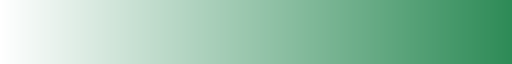

In [30]:
custom_cmap

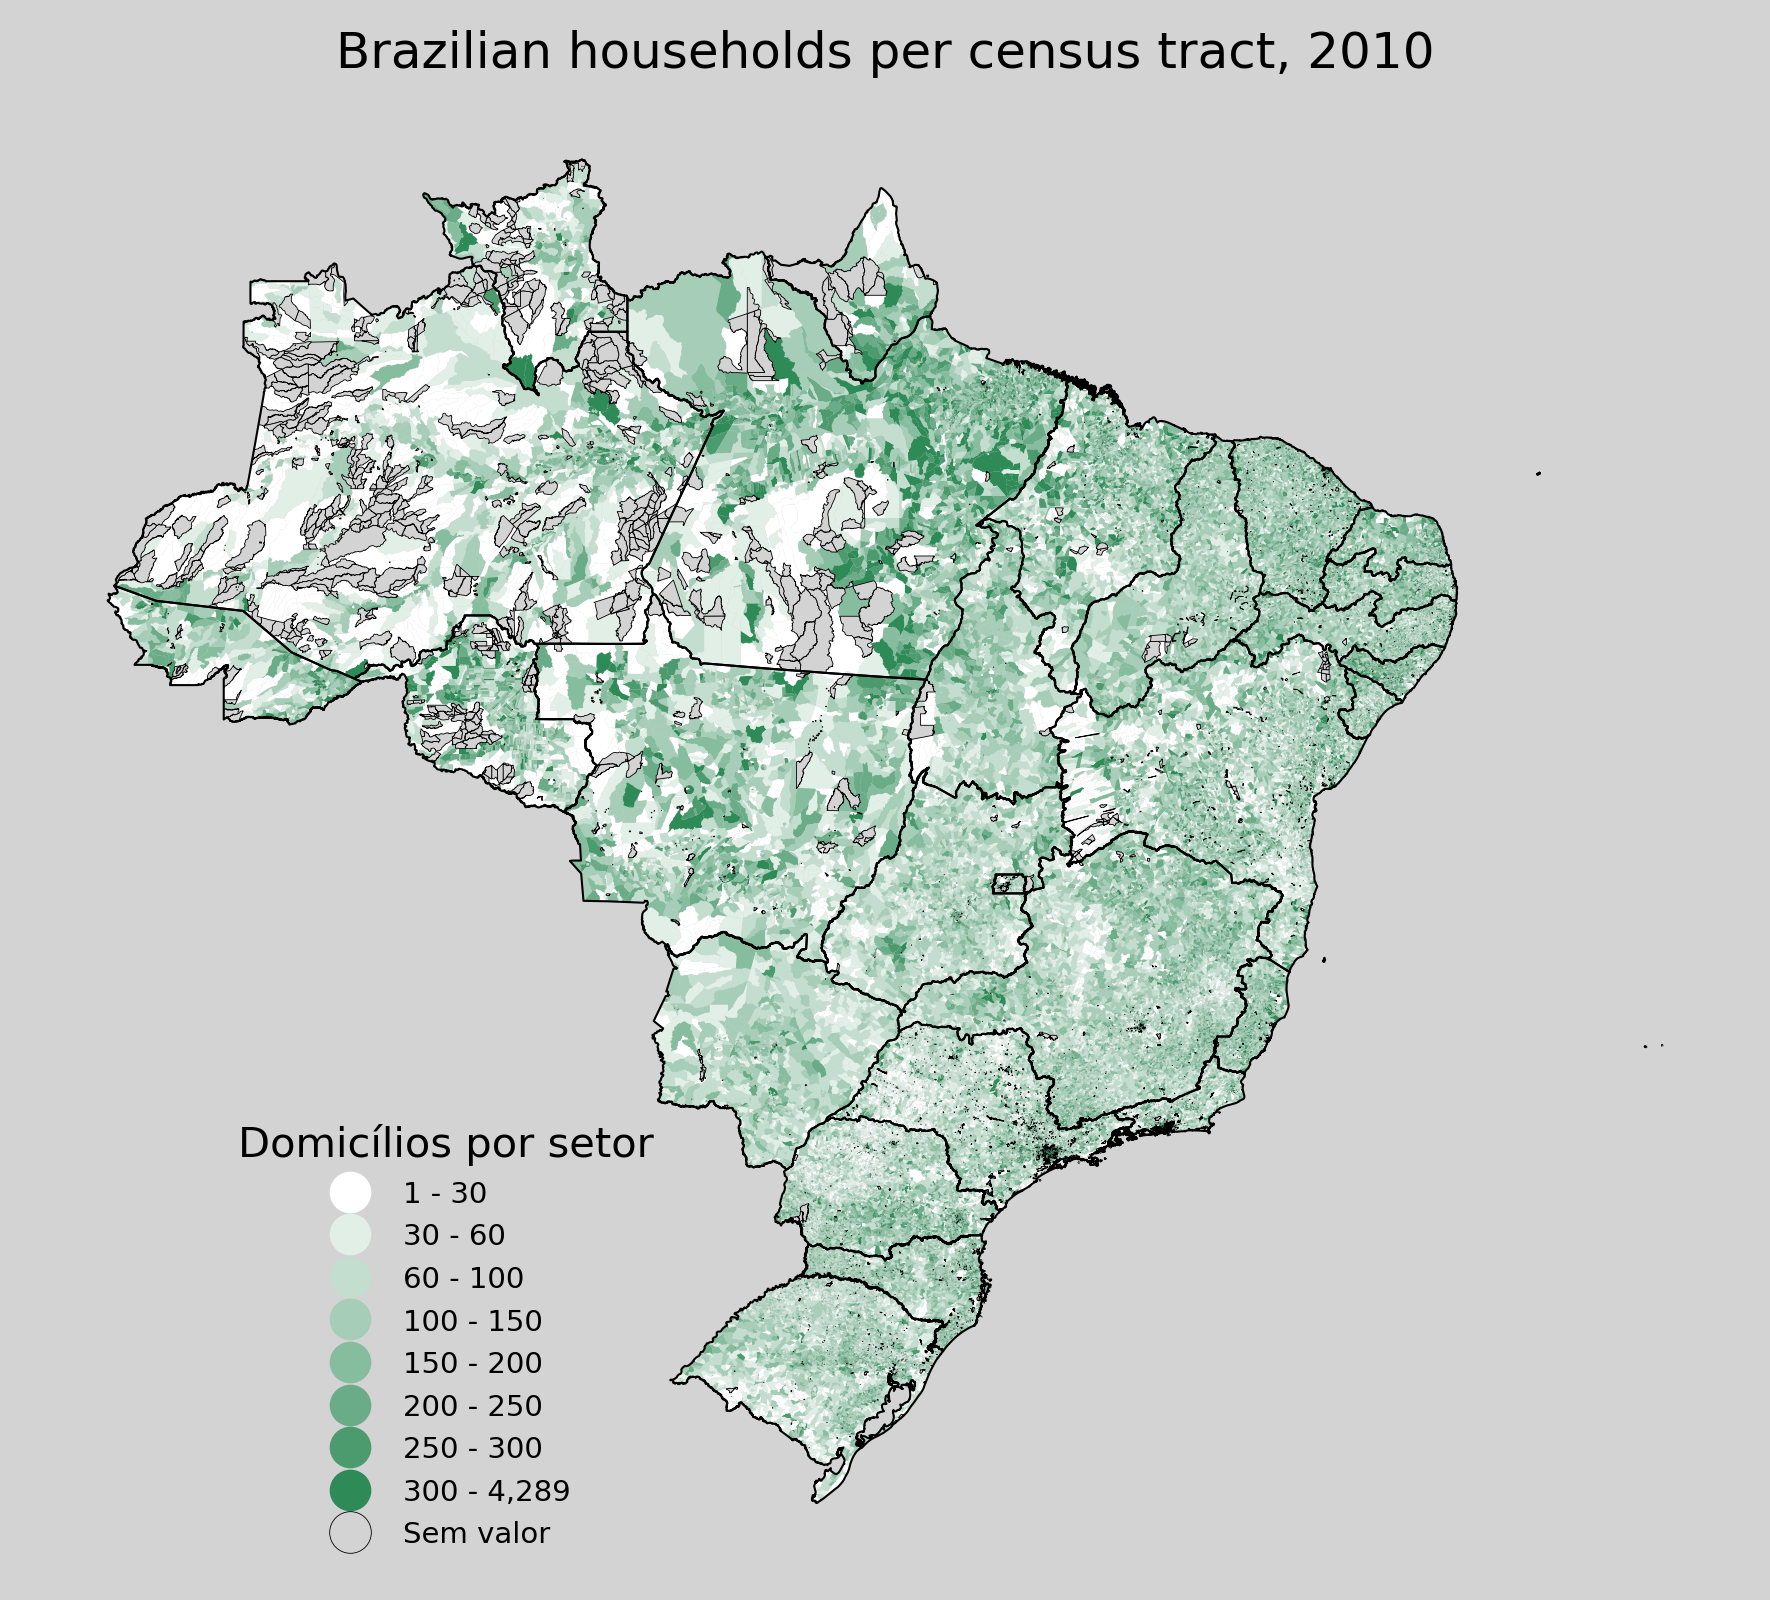

In [31]:
figsize=(6,6)

fig, ax = plt.subplots(nrows=1, ncols=1,
                      figsize=figsize, dpi=300)

plot = census_tract.plot(column='Domicilios_particulares_e_coletivos',
                    cmap=custom_cmap,
                    figsize=figsize,
                    scheme='userdefined',
                    # edgecolor='grey',
                    # lw = 0.1,
                    # k=10,
                    legend=True, ax=ax, vmin = 0,
                   missing_kwds={"color": "lightgrey",
                                 "edgecolor": "black",
                                 # "hatch": "///",
                                 "label": "Sem valor",
                                 "linewidth": 0.2},
                    legend_kwds={
                        "title": "Domicílios por setor",
                        "fontsize": 7,
                        "ncol": 1,
                        "frameon": False},
                   classification_kwds={'bins': [30,60,100,150,200,250,300]})

states.plot(facecolor = 'none', edgecolor='black', figsize=figsize,
            lw = 0.5, alpha = 1, ax = ax)
ax.set_title("Brazilian households per census tract, 2010")

ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((0.38, 0.32))
lgd = ax.get_legend()
for lbl in lgd.get_texts():
    try:
        label_text = lbl.get_text()
        float_num_1 = label_text.split(' ')[0]
        float_num_2 = label_text.split(' ')[2]
        new_text = f'{float(float_num_1):,.0f} - {float(float_num_2):,.0f}'
        lbl.set_text(new_text)
    except:
        pass

fig.tight_layout()
fig.patch.set_color('lightgray')

# plt.savefig('Domicilios_setor_censitario_brasil_2021_cmap_blue_to_orange_to_red.png', dpi = 300,
#             bbox_inches = 'tight')
# plt.savefig('Domicilios_setor_censitario_brasil_2021_cmap_blue_to_orange_to_red.svg', dpi = 300,
#             bbox_inches = 'tight')
plt.show()

## Distance from census tract to health facilities

In [32]:
gdf = gpd.read_file('Census_tract_Brasil_distances_from_health_facilities_0_to_316544.csv',
                    GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")

In [35]:
gdf['minimum_dist'] = gdf['minimum_dist'].astype('float')

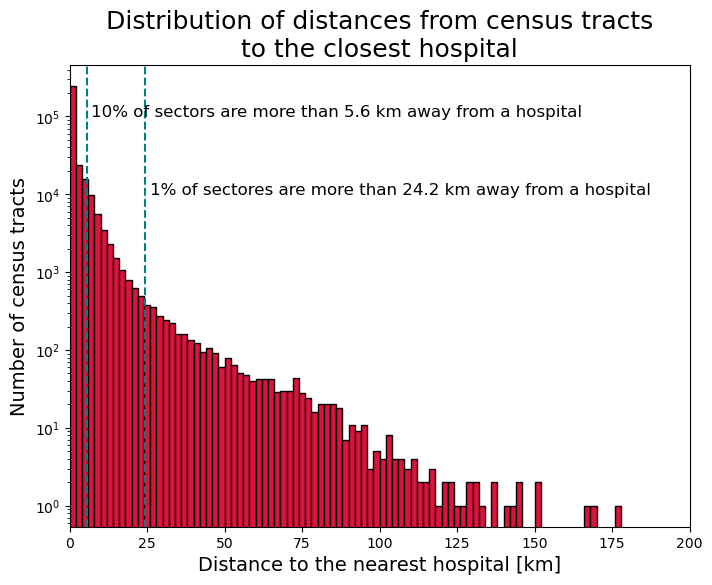

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
plt.hist(gdf['minimum_dist'], bins = [2*i for i in range(101)], edgecolor = 'black',
        color = 'crimson')
plt.yscale('log')
plt.xlim(0, 200)
# plt.xscale('log')
plt.xlabel('Distance to the nearest hospital [km]', fontsize = 14)
plt.ylabel('Number of census tracts', fontsize = 14)
plt.axvline(np.percentile(gdf['minimum_dist'], 90), ls = '--', color = 'teal')
plt.text(7, 1e5, f"10% of sectors are more than {np.percentile(gdf['minimum_dist'], 90):.1f} km away from a hospital",
         fontsize = 12)
plt.text(26, 1e4, f"1% of sectores are more than {np.percentile(gdf['minimum_dist'], 99):.1f} km away from a hospital",
         fontsize = 12)
plt.axvline(np.percentile(gdf['minimum_dist'], 99), ls = '--', color = 'teal')
plt.title('Distribution of distances from census tracts'
          '\n'
          'to the closest hospital', fontsize = 18)
# plt.savefig('Setores_distribuicao_distancias.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [37]:
print(f"Proportion more than 5 km away: {len(np.where(gdf['minimum_dist'].values > 5)[0])/len(gdf['minimum_dist'].values):.3f}")
print(f"Proportion more than 10 km away: {len(np.where(gdf['minimum_dist'].values > 10)[0])/len(gdf['minimum_dist'].values):.3f}")
print(f"Proportion more than 40 km away: {len(np.where(gdf['minimum_dist'].values > 40)[0])/len(gdf['minimum_dist'].values):.3f}")

Proportion more than 5 km away: 0.113
Proportion more than 10 km away: 0.043
Proportion more than 40 km away: 0.004


In [75]:
# List of colors
colors = ['white', 'lightpink', "magenta", 'darkmagenta']

# Create linear transitions between colors to make colormaps
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list("", colors)

# Reverse list of colors
colors.reverse()

# Create other colormaps with same colors but reversed order
custom_cmap_r = mpl.colors.LinearSegmentedColormap.from_list("", colors)

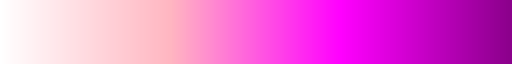

In [76]:
custom_cmap

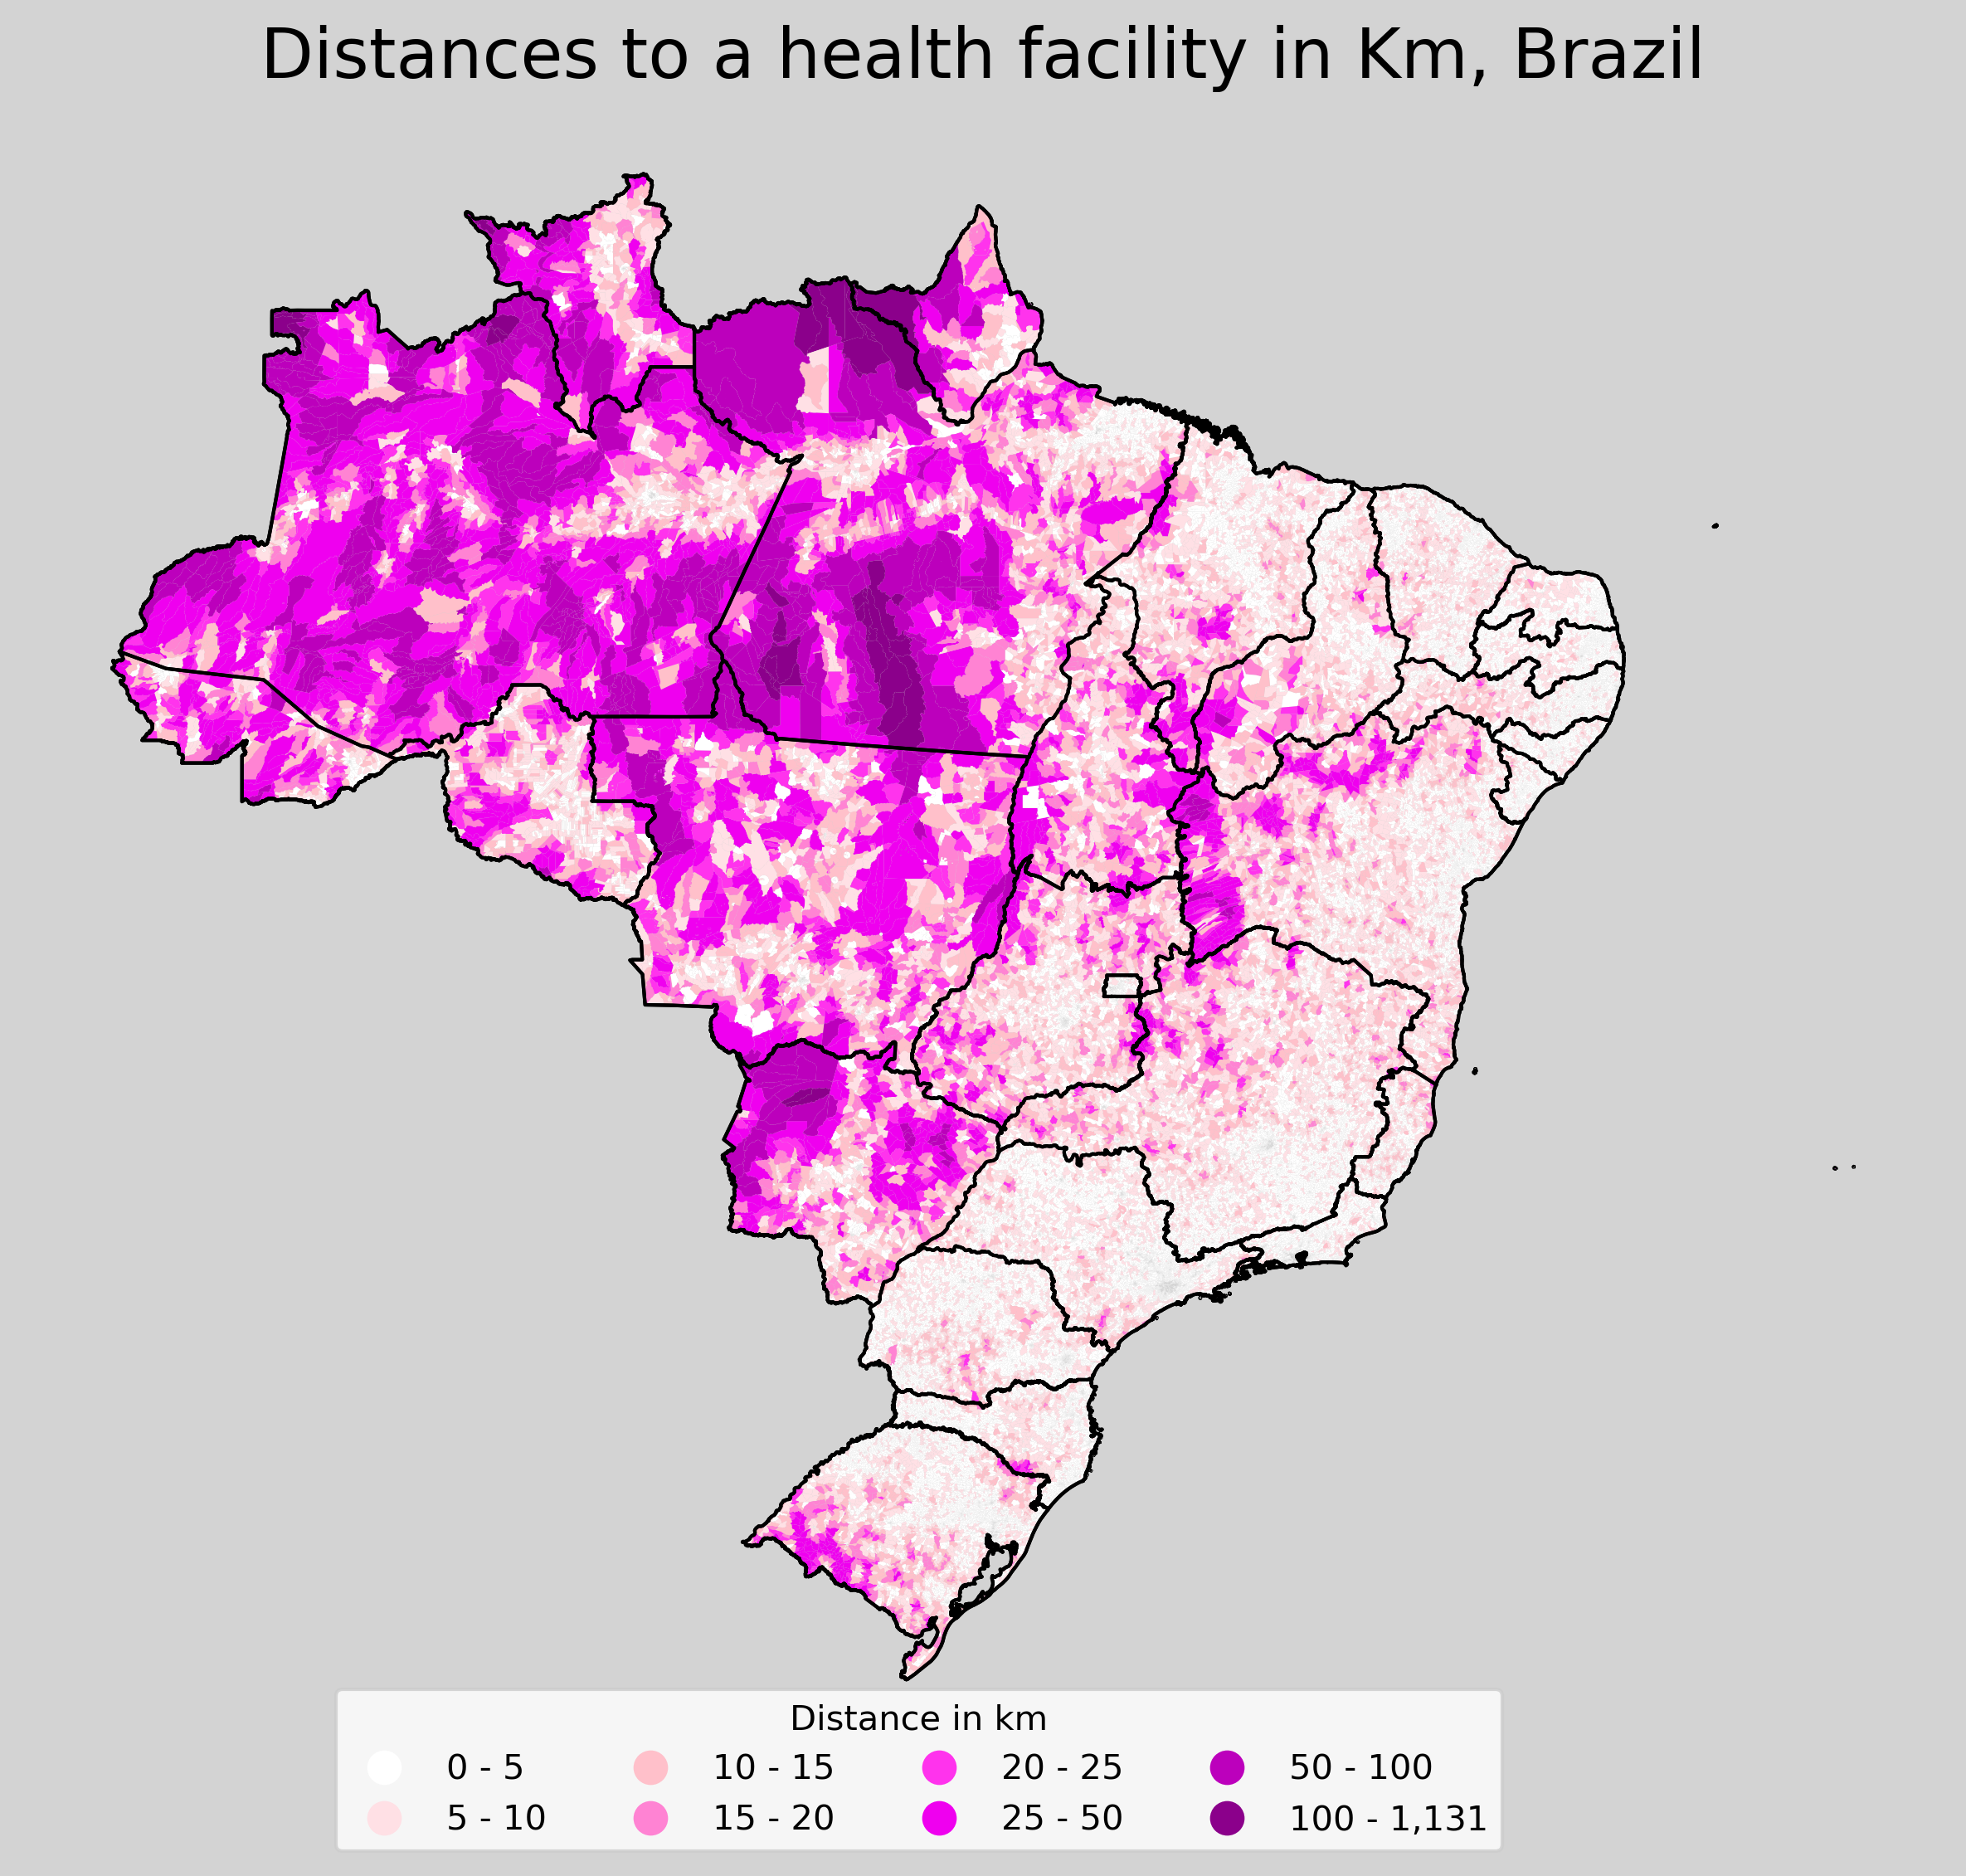

In [77]:
cmap = custom_cmap#'OrRd'
colors = 8
figsize = (8, 8)

fig, ax = plt.subplots(nrows=1, ncols=1,
                      figsize=figsize, dpi=300)

gdf.plot(column='minimum_dist', cmap=cmap, figsize=figsize, scheme='userdefined',
           legend=True, ax=ax, vmin = 0, legend_kwds = {'ncol': 4},
           classification_kwds={'bins': [5,10,15,20,25,50,100]}, k = colors)
country.plot(facecolor='none', edgecolor='black', ax = ax)
states.plot(facecolor='none', edgecolor='black', ax = ax)
# health.plot(color='#FEBF57', markersize=3, ax=ax)
ax.set_title(f'Distances to a health facility in Km, Brazil', fontsize=20)
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((0.78, 0.05))
ax.get_legend().set_title('Distance in km')
lgd = ax.get_legend()
for lbl in lgd.get_texts():
    label_text = lbl.get_text()
    float_num_1 = label_text.split(' ')[0]
    float_num_2 = label_text.split(' ')[2]
    new_text = f'{float(float_num_1):,.0f} - {float(float_num_2):,.0f}'
    lbl.set_text(new_text)

fig.tight_layout()
fig.patch.set_color('lightgray')
# fig.savefig(f'distance_from_health_facilities_census_tracts_{str(cmap)}.png', dpi = 300,
#             bbox_inches = 'tight')
# fig.savefig(f'distance_from_health_facilities_census_tracts_{str(cmap)}.svg', dpi = 300,
#             bbox_inches = 'tight')
plt.show()

## Bivariate map households and distances

In [41]:
gdf = gpd.read_file('Census_tract_Brasil_distances_from_health_facilities_0_to_316544.csv',
                    GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")

In [42]:
df = pd.read_csv('Domicilios_particulares_e_coletivos_por_setor_censitario_2010.csv',
                 sep = ',')

In [43]:
gdf['code_tract'] = gdf['code_tract'].astype('float')
gdf['minimum_dist'] = gdf['minimum_dist'].astype('float')

In [44]:
gdf = pd.DataFrame(gdf).merge(df, how="left", left_on="code_tract", right_on="Cod_setor")

In [45]:
households_distances = []

for i in tqdm(range(100)):
    new_df = gdf.loc[(gdf['minimum_dist'] < 2*(i+1)) & (gdf['minimum_dist'] >= 2*i)].reset_index(drop=True)
    households_distances.append([np.sum(new_df['Domicilios_particulares_e_coletivos']), 1+2*i])
    
households_distances = np.array(households_distances)

100%|██████████| 100/100 [00:01<00:00, 78.39it/s]


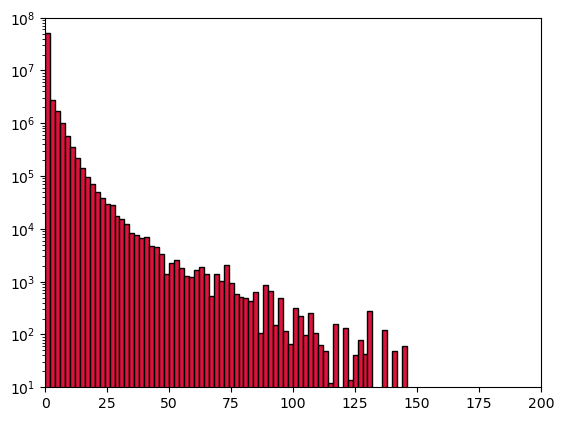

In [46]:
fig, ax = plt.subplots()
plt.bar(households_distances[:,1], households_distances[:,0], width = 2, edgecolor = 'black',
       color = 'crimson')
plt.yscale('log')
plt.ylim(1e1, 1e8)
plt.xlim(0, 200)
plt.show()

In [47]:
def f(x, A, b, c):
    return A*np.exp(-b*x)/(x**c)

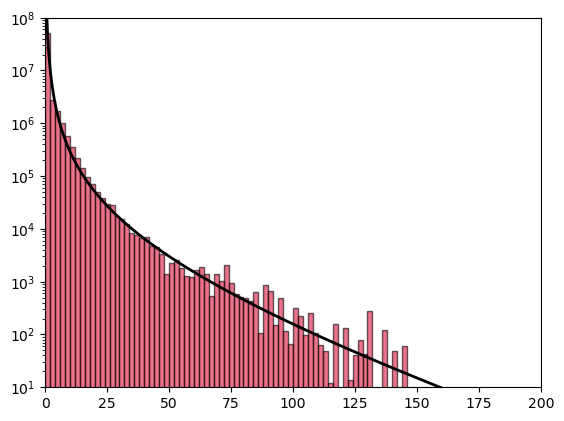

In [48]:
x = np.linspace(0, 200, 1000)

fig, ax = plt.subplots()
plt.bar(households_distances[:,1], households_distances[:,0], width = 2, edgecolor = 'black',
       color = 'crimson', alpha = 0.6)
plt.plot(x, f(x, 5e7, 0.03, 2.1), color = 'black', lw = 2)
plt.yscale('log')
plt.ylim(1e1, 1e8)
plt.xlim(0, 200)
plt.show()

I classify each census tract in one of the bellow categories, depending on the number of households and the distance to the hospital. Each category is assined a number, that is then used to plot the map.

| Households \ Distance | 0 - 5 km | 5 - 10 km | 10 - 15 km | 15 - 20 km | 25 - 50 km | 50 - 100 km | 100 - 200 km | 200+ km |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|300+| A8 | B8 | C8 | D8 | E8 | F8 | G8 | H8 |
|250 - 300| A7 | B7 | C7 | D7 | E7 | F7 | G7 | H7 |
|200 - 250| A6 | B6 | C6 | D6 | E6 | F6 | G6 | H6 |
|150 - 200| A5 | B5 | C5 | D5 | E5 | F5 | G5 | H5 |
|100 - 150| A4 | B4 | C4 | D4 | E4 | F4 | G4 | H4 |
|60 - 100| A3 | B3 | C3 | D3 | E3 | F3 | G3 | H3 |
|30 - 60| A2 | B2 | C2 | D2 | E2 | F2 | G2 | H2 |
|0 - 30| A1 | B1 | C1 | D1 | E1 | F1 | G1 | H1 |

In [49]:
# This is probably the least efficient way to do this, but I didn't want to think to I just did it this way
code_color = []
code_bivariate = []
for i in tqdm(range(len(gdf))):
    if gdf['minimum_dist'][i] <= 5 and gdf['Domicilios_particulares_e_coletivos'][i] <= 30:
        code_color.append('A1')
        code_bivariate.append(1)
    elif gdf['minimum_dist'][i] <= 5 and 30 < gdf['Domicilios_particulares_e_coletivos'][i] < 60:
        code_color.append('A2')
        code_bivariate.append(2)
    elif gdf['minimum_dist'][i] <= 5 and 60 < gdf['Domicilios_particulares_e_coletivos'][i] < 100:
        code_color.append('A3')
        code_bivariate.append(3)
    elif gdf['minimum_dist'][i] <= 5 and 100 < gdf['Domicilios_particulares_e_coletivos'][i] < 150:
        code_color.append('A4')
        code_bivariate.append(4)
    elif gdf['minimum_dist'][i] <= 5 and 150 < gdf['Domicilios_particulares_e_coletivos'][i] < 200:
        code_color.append('A5')
        code_bivariate.append(5)
    elif gdf['minimum_dist'][i] <= 5 and 200 < gdf['Domicilios_particulares_e_coletivos'][i] < 250:
        code_color.append('A6')
        code_bivariate.append(6)
    elif gdf['minimum_dist'][i] <= 5 and 250 < gdf['Domicilios_particulares_e_coletivos'][i] < 300:
        code_color.append('A7')
        code_bivariate.append(7)
    elif gdf['minimum_dist'][i] <= 5 and 300 < gdf['Domicilios_particulares_e_coletivos'][i]:
        code_color.append('A8')
        code_bivariate.append(8)
    
    elif 5 < gdf['minimum_dist'][i] <= 10 and gdf['Domicilios_particulares_e_coletivos'][i] <= 30:
        code_color.append('B1')
        code_bivariate.append(9)
    elif 5 < gdf['minimum_dist'][i] <= 10 and 30 < gdf['Domicilios_particulares_e_coletivos'][i] < 60:
        code_color.append('B2')
        code_bivariate.append(10)
    elif 5 < gdf['minimum_dist'][i] <= 10 and 60 < gdf['Domicilios_particulares_e_coletivos'][i] < 100:
        code_color.append('B3')
        code_bivariate.append(11)
    elif 5 < gdf['minimum_dist'][i] <= 10 and 100 < gdf['Domicilios_particulares_e_coletivos'][i] < 150:
        code_color.append('B4')
        code_bivariate.append(12)
    elif 5 < gdf['minimum_dist'][i] <= 10 and 150 < gdf['Domicilios_particulares_e_coletivos'][i] < 200:
        code_color.append('B5')
        code_bivariate.append(13)
    elif 5 < gdf['minimum_dist'][i] <= 10 and 200 < gdf['Domicilios_particulares_e_coletivos'][i] < 250:
        code_color.append('B6')
        code_bivariate.append(14)
    elif 5 < gdf['minimum_dist'][i] <= 10 and 250 < gdf['Domicilios_particulares_e_coletivos'][i] < 300:
        code_color.append('B7')
        code_bivariate.append(15)
    elif 5 < gdf['minimum_dist'][i] <= 10 and 300 < gdf['Domicilios_particulares_e_coletivos'][i]:
        code_color.append('B8')
        code_bivariate.append(16)
    
    elif 10 < gdf['minimum_dist'][i] <= 15 and gdf['Domicilios_particulares_e_coletivos'][i] <= 30:
        code_color.append('C1')
        code_bivariate.append(17)
    elif 10 < gdf['minimum_dist'][i] <= 15 and 30 < gdf['Domicilios_particulares_e_coletivos'][i] < 60:
        code_color.append('C2')
        code_bivariate.append(18)
    elif 10 < gdf['minimum_dist'][i] <= 15 and 60 < gdf['Domicilios_particulares_e_coletivos'][i] < 100:
        code_color.append('C3')
        code_bivariate.append(19)
    elif 10 < gdf['minimum_dist'][i] <= 15 and 100 < gdf['Domicilios_particulares_e_coletivos'][i] < 150:
        code_color.append('C4')
        code_bivariate.append(20)
    elif 10 < gdf['minimum_dist'][i] <= 15 and 150 < gdf['Domicilios_particulares_e_coletivos'][i] < 200:
        code_color.append('C5')
        code_bivariate.append(21)
    elif 10 < gdf['minimum_dist'][i] <= 15 and 200 < gdf['Domicilios_particulares_e_coletivos'][i] < 250:
        code_color.append('C6')
        code_bivariate.append(22)
    elif 10 < gdf['minimum_dist'][i] <= 15 and 250 < gdf['Domicilios_particulares_e_coletivos'][i] < 300:
        code_color.append('C7')
        code_bivariate.append(23)
    elif 10 < gdf['minimum_dist'][i] <= 15 and 300 < gdf['Domicilios_particulares_e_coletivos'][i]:
        code_color.append('C8')
        code_bivariate.append(24)
        
    elif 15 < gdf['minimum_dist'][i] <= 20 and gdf['Domicilios_particulares_e_coletivos'][i] <= 30:
        code_color.append('D1')
        code_bivariate.append(25)
    elif 15 < gdf['minimum_dist'][i] <= 20 and 30 < gdf['Domicilios_particulares_e_coletivos'][i] < 60:
        code_color.append('D2')
        code_bivariate.append(26)
    elif 15 < gdf['minimum_dist'][i] <= 20 and 60 < gdf['Domicilios_particulares_e_coletivos'][i] < 100:
        code_color.append('D3')
        code_bivariate.append(27)
    elif 15 < gdf['minimum_dist'][i] <= 20 and 100 < gdf['Domicilios_particulares_e_coletivos'][i] < 150:
        code_color.append('D4')
        code_bivariate.append(28)
    elif 15 < gdf['minimum_dist'][i] <= 20 and 150 < gdf['Domicilios_particulares_e_coletivos'][i] < 200:
        code_color.append('D5')
        code_bivariate.append(29)
    elif 15 < gdf['minimum_dist'][i] <= 20 and 200 < gdf['Domicilios_particulares_e_coletivos'][i] < 250:
        code_color.append('D6')
        code_bivariate.append(30)
    elif 15 < gdf['minimum_dist'][i] <= 20 and 250 < gdf['Domicilios_particulares_e_coletivos'][i] < 300:
        code_color.append('D7')
        code_bivariate.append(31)
    elif 15 < gdf['minimum_dist'][i] <= 20 and 300 < gdf['Domicilios_particulares_e_coletivos'][i]:
        code_color.append('D8')
        code_bivariate.append(32)
    
    elif 20 < gdf['minimum_dist'][i] <= 25 and gdf['Domicilios_particulares_e_coletivos'][i] <= 30:
        code_color.append('E1')
        code_bivariate.append(33)
    elif 20 < gdf['minimum_dist'][i] <= 25 and 30 < gdf['Domicilios_particulares_e_coletivos'][i] < 60:
        code_color.append('E2')
        code_bivariate.append(34)
    elif 20 < gdf['minimum_dist'][i] <= 25 and 60 < gdf['Domicilios_particulares_e_coletivos'][i] < 100:
        code_color.append('E3')
        code_bivariate.append(35)
    elif 20 < gdf['minimum_dist'][i] <= 25 and 100 < gdf['Domicilios_particulares_e_coletivos'][i] < 150:
        code_color.append('E4')
        code_bivariate.append(36)
    elif 20 < gdf['minimum_dist'][i] <= 25 and 150 < gdf['Domicilios_particulares_e_coletivos'][i] < 200:
        code_color.append('E5')
        code_bivariate.append(37)
    elif 20 < gdf['minimum_dist'][i] <= 25 and 200 < gdf['Domicilios_particulares_e_coletivos'][i] < 250:
        code_color.append('E6')
        code_bivariate.append(38)
    elif 20 < gdf['minimum_dist'][i] <= 25 and 250 < gdf['Domicilios_particulares_e_coletivos'][i] < 300:
        code_color.append('E7')
        code_bivariate.append(39)
    elif 20 < gdf['minimum_dist'][i] <= 25 and 300 < gdf['Domicilios_particulares_e_coletivos'][i]:
        code_color.append('E8')
        code_bivariate.append(40)
    
    elif 25 < gdf['minimum_dist'][i] <= 50 and gdf['Domicilios_particulares_e_coletivos'][i] <= 30:
        code_color.append('F1')
        code_bivariate.append(41)
    elif 25 < gdf['minimum_dist'][i] <= 50 and 30 < gdf['Domicilios_particulares_e_coletivos'][i] < 60:
        code_color.append('F2')
        code_bivariate.append(42)
    elif 25 < gdf['minimum_dist'][i] <= 50 and 60 < gdf['Domicilios_particulares_e_coletivos'][i] < 100:
        code_color.append('F3')
        code_bivariate.append(43)
    elif 25 < gdf['minimum_dist'][i] <= 50 and 100 < gdf['Domicilios_particulares_e_coletivos'][i] < 150:
        code_color.append('F4')
        code_bivariate.append(44)
    elif 25 < gdf['minimum_dist'][i] <= 50 and 150 < gdf['Domicilios_particulares_e_coletivos'][i] < 200:
        code_color.append('F5')
        code_bivariate.append(45)
    elif 25 < gdf['minimum_dist'][i] <= 50 and 200 < gdf['Domicilios_particulares_e_coletivos'][i] < 250:
        code_color.append('F6')
        code_bivariate.append(46)
    elif 25 < gdf['minimum_dist'][i] <= 50 and 250 < gdf['Domicilios_particulares_e_coletivos'][i] < 300:
        code_color.append('F7')
        code_bivariate.append(47)
    elif 25 < gdf['minimum_dist'][i] <= 50 and 300 < gdf['Domicilios_particulares_e_coletivos'][i]:
        code_color.append('F8')
        code_bivariate.append(48)
    
    elif 50 < gdf['minimum_dist'][i] <= 100 and gdf['Domicilios_particulares_e_coletivos'][i] <= 30:
        code_color.append('G1')
        code_bivariate.append(49)
    elif 50 < gdf['minimum_dist'][i] <= 100 and 30 < gdf['Domicilios_particulares_e_coletivos'][i] < 60:
        code_color.append('G2')
        code_bivariate.append(50)
    elif 50 < gdf['minimum_dist'][i] <= 100 and 60 < gdf['Domicilios_particulares_e_coletivos'][i] < 100:
        code_color.append('G3')
        code_bivariate.append(51)
    elif 50 < gdf['minimum_dist'][i] <= 100 and 100 < gdf['Domicilios_particulares_e_coletivos'][i] < 150:
        code_color.append('G4')
        code_bivariate.append(52)
    elif 50 < gdf['minimum_dist'][i] <= 100 and 150 < gdf['Domicilios_particulares_e_coletivos'][i] < 200:
        code_color.append('G5')
        code_bivariate.append(53)
    elif 50 < gdf['minimum_dist'][i] <= 100 and 200 < gdf['Domicilios_particulares_e_coletivos'][i] < 250:
        code_color.append('G6')
        code_bivariate.append(54)
    elif 50 < gdf['minimum_dist'][i] <= 100 and 250 < gdf['Domicilios_particulares_e_coletivos'][i] < 300:
        code_color.append('G7')
        code_bivariate.append(55)
    elif 50 < gdf['minimum_dist'][i] <= 100 and 300 < gdf['Domicilios_particulares_e_coletivos'][i]:
        code_color.append('G8')
        code_bivariate.append(56)
        
    elif 100 < gdf['minimum_dist'][i] and gdf['Domicilios_particulares_e_coletivos'][i] <= 30:
        code_color.append('H1')
        code_bivariate.append(57)
    elif 100 < gdf['minimum_dist'][i] and 30 < gdf['Domicilios_particulares_e_coletivos'][i] < 60:
        code_color.append('H2')
        code_bivariate.append(58)
    elif 100 < gdf['minimum_dist'][i] and 60 < gdf['Domicilios_particulares_e_coletivos'][i] < 100:
        code_color.append('H3')
        code_bivariate.append(59)
    elif 100 < gdf['minimum_dist'][i] and 100 < gdf['Domicilios_particulares_e_coletivos'][i] < 150:
        code_color.append('H4')
        code_bivariate.append(60)
    elif 100 < gdf['minimum_dist'][i] and 150 < gdf['Domicilios_particulares_e_coletivos'][i] < 200:
        code_color.append('H5')
        code_bivariate.append(61)
    elif 100 < gdf['minimum_dist'][i] and 200 < gdf['Domicilios_particulares_e_coletivos'][i] < 250:
        code_color.append('H6')
        code_bivariate.append(62)
    elif 100 < gdf['minimum_dist'][i] and 250 < gdf['Domicilios_particulares_e_coletivos'][i] < 300:
        code_color.append('H7')
        code_bivariate.append(63)
    elif 100 < gdf['minimum_dist'][i] and 300 < gdf['Domicilios_particulares_e_coletivos'][i]:
        code_color.append('H8')
        code_bivariate.append(64)
    else:
        code_color.append(np.nan)
        code_bivariate.append(np.nan)

100%|██████████| 316545/316545 [00:26<00:00, 12038.64it/s]


In [50]:
code_color = np.array(code_color)
code_bivariate = np.array(code_bivariate)-0.5

gdf['Code_color'] = code_color
gdf['Code_bivariate'] = code_bivariate

In [51]:
gdf = gpd.GeoDataFrame(gdf)

In [87]:
colors = []
c1 = 'seagreen'
c2 = 'darkorange'

for i in range(8):
    for j in range(8):
        r = min([sns.light_palette(c1, 8)[j][0], sns.light_palette(c2, 8)[i][0]])
        g = min([sns.light_palette(c1, 8)[j][1], sns.light_palette(c2, 8)[i][2]])
        b = min([sns.light_palette(c1, 8)[j][2], sns.light_palette(c2, 8)[i][1]])
        colors.append((r,g,b))

In [88]:
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list("", colors)

# Reverse list of colors
colors.reverse()

# Create other colormaps with same colors but reversed order
custom_cmap_r = mpl.colors.LinearSegmentedColormap.from_list("", colors)

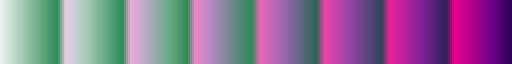

In [89]:
custom_cmap

In [90]:
lgd = np.zeros((8,8))
n = -1
for i in range(8):
    n += 1
    for j in range(8):
        lgd[i,j] = 8*n + j + 1

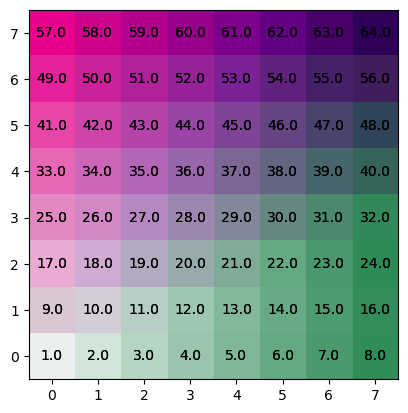

In [91]:
plt.imshow(lgd, cmap = custom_cmap)
plt.ylim(-0.5,7.5)
plt.xlim(-0.5,7.5)
for (j,i),label in np.ndenumerate(lgd):
    plt.text(i,j,label,ha='center',va='center')
    plt.text(i,j,label,ha='center',va='center')
plt.show()

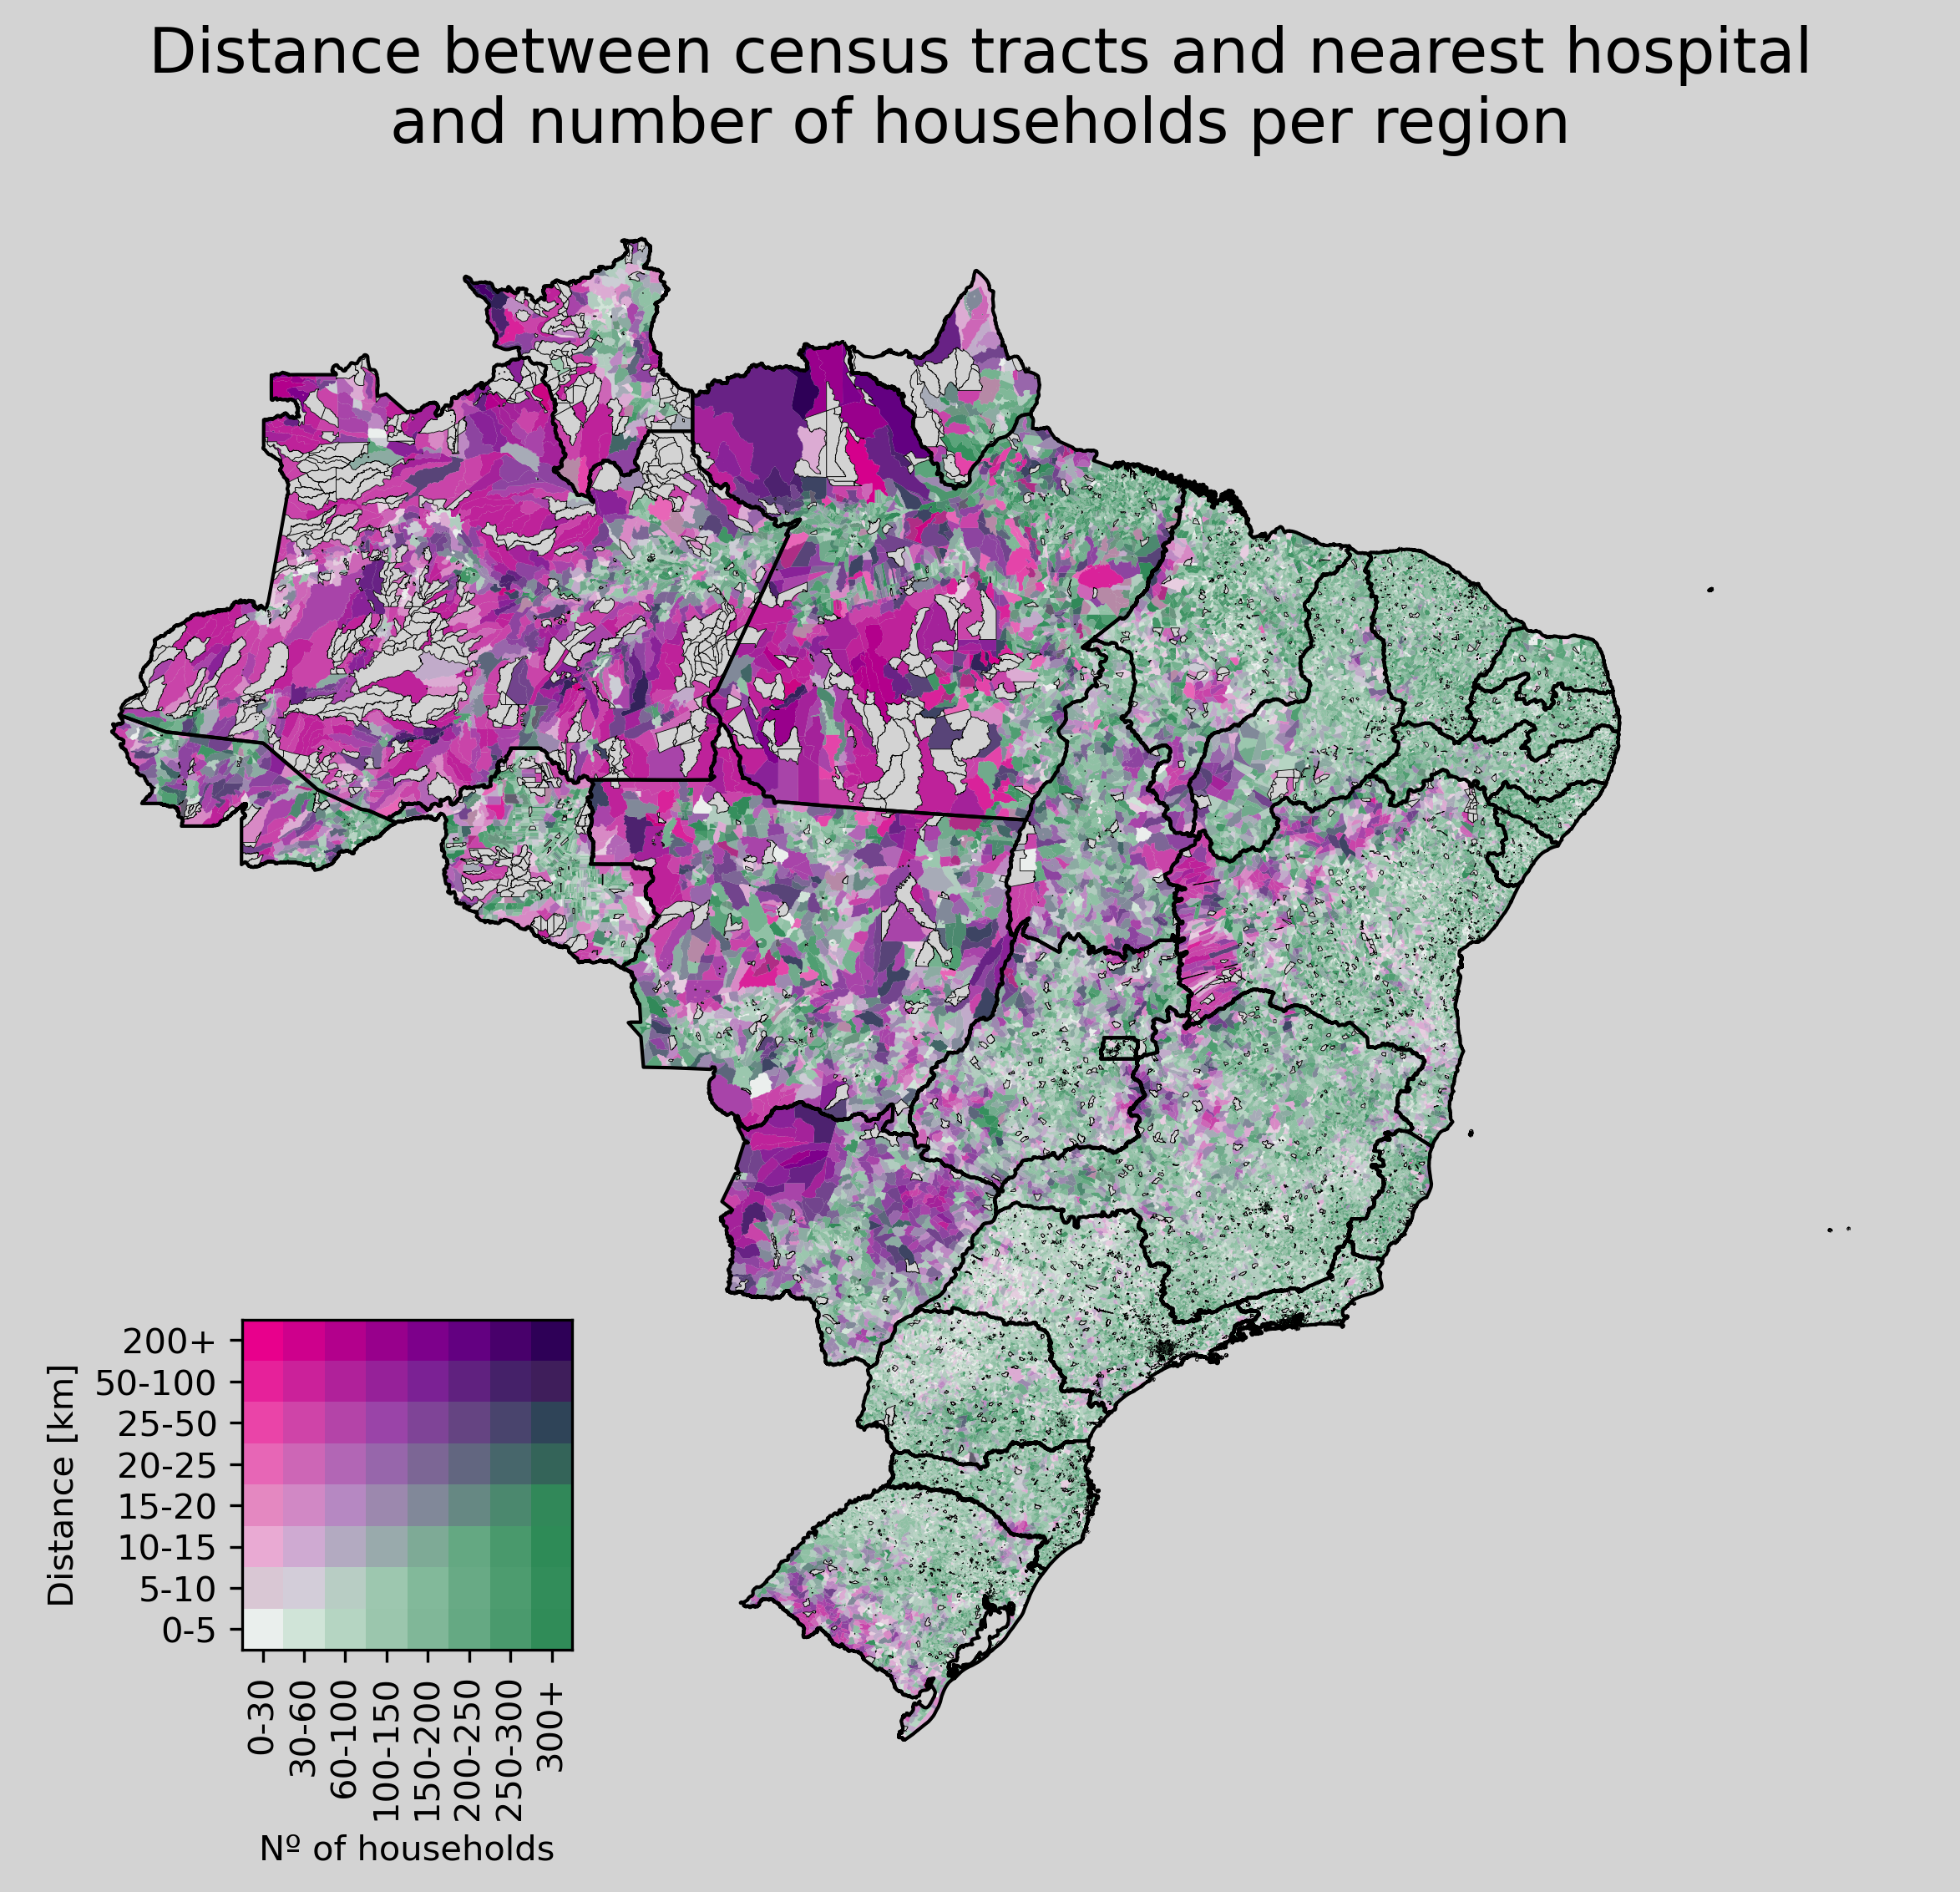

In [92]:
fig, ax = plt.subplots(nrows=1, ncols=1,
                      figsize=(8,8), dpi=300)

gdf.plot(column='Code_bivariate', cmap=custom_cmap, figsize=(8,8), scheme='userdefined',
         ax=ax, classification_kwds={'bins': [i for i in range(64)]}, k = 64,
         missing_kwds={"color": "lightgrey",
                       "edgecolor": "black",
                       # "hatch": "///",
                       "label": "Sem valor",
                       "linewidth": 0.2})
states.plot(facecolor='none', edgecolor='black', ax = ax)
ax.set_title(f'Distance between census tracts and nearest hospital'
             '\n'
             'and number of households per region', fontsize=18)
ax.set_axis_off()

axins = ax.inset_axes([0.1, 0.1, 0.2, 0.2])
axins.imshow(lgd, cmap = custom_cmap, origin="lower")
# sub region of the original image
x1, x2, y1, y2 = -0.5, 7.5, -0.5, 7.5
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([i for i in range(8)])
axins.set_yticks([i for i in range(8)])
axins.set_xticklabels(['0-30','30-60','60-100','100-150','150-200','200-250','250-300','300+'],
                      rotation = 90)
axins.set_yticklabels(['0-5','5-10','10-15','15-20','20-25','25-50','50-100','200+'])
axins.set_xlabel('Nº of households')
axins.set_ylabel('Distance [km]')

fig.tight_layout()
fig.patch.set_color('lightgrey')
# fig.savefig(f'Bivariate_map_distances_and_households_v3.png', dpi = 300,
#             bbox_inches = 'tight')
# fig.savefig(f'Bivariate_map_distances_and_households_v3.svg', dpi = 300,
#             bbox_inches = 'tight')
plt.show()